# K-Nearest Neighborhood Algorithm 실습

## 1. 데이터 불러오기, 모듈 불러오기 및 KNN 피팅 방법

In [4]:
from sklearn import neighbors, datasets

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [6]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

KNeighborsClassifier()

In [7]:
y_pred = clf.predict(X)

In [8]:
from sklearn.metrics import confusion_matrix

In [10]:
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

## 2. Cross-Validation을 활용한 최적의 k 찾기

In [14]:
from sklearn.model_selection import cross_val_score

- cv 진행

In [17]:
k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn,X,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())

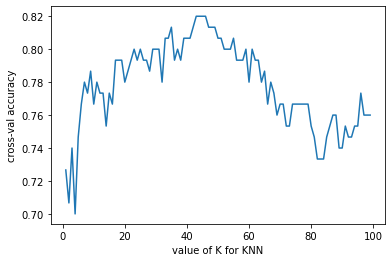

In [18]:
plt.plot(k_range,k_scores)
plt.xlabel("value of K for KNN")
plt.ylabel("cross-val accuracy")
plt.show()

# 2. Weight를 준 kNN

/var/folders/p1/kf4mwjln5nx8q343yc1yc4ch0000gn/T/ipykernel_27027/1914950873.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
/var/folders/p1/kf4mwjln5nx8q343yc1yc4ch0000gn/T/ipykernel_27027/1914950873.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=cmap_light)


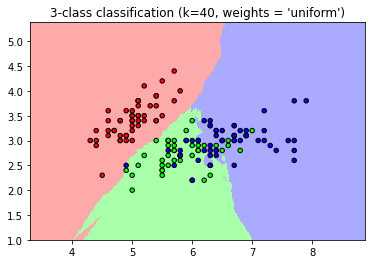

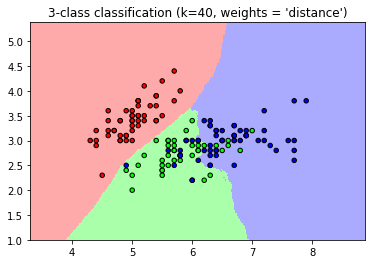

In [19]:
n_neighbors = 40

h = .02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for weights in ['uniform','distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X,y)
    
    # Plot the decision boundary, For that, we will assign a color to each 
    # point in the mesh [x_min, x_max] x [y_min, y_max]
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max()+1
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h,),
                        np.arange(y_min,y_max,h))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    # Plot also the trining points
    plt.scatter(X[:, 0], X[:,1], c=y, cmap=cmap_bold,
               edgecolor='k',s=20)
    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title("3-class classification (k=%i, weights = '%s')"
             %(n_neighbors, weights))

In [20]:
np.random.seed(0)
X = np.sort(5*np.random.rand(40,1),axis=0)